In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


C:\Users\girid\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# loading the diabetes dataset to a pandas Data Frame
diabetes_dataset = pd.read_csv('diabetes2.csv')

In [3]:

pd.read_csv?

In [4]:

#printing the first 5 rows of the dtaaset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

# number of the rows and columns in this dataset
diabetes_dataset.shape


(768, 9)

In [6]:

# getting ths statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
'''Checking null values'''
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
'''Checking Duplicate values'''
diabetes_dataset.duplicated().sum()

0

In [10]:

diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:

#seperating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
     

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


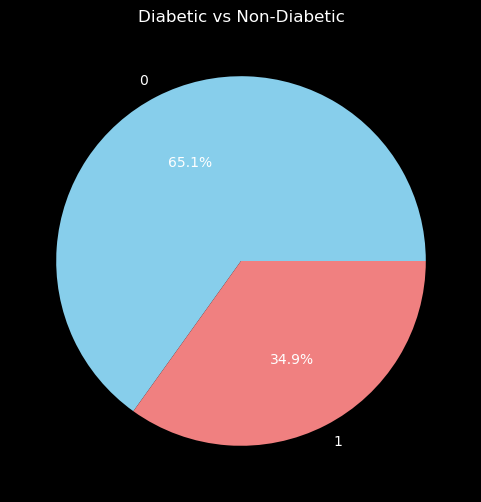

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
diabetes_dataset['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Diabetic vs Non-Diabetic')
plt.ylabel('')
plt.show()

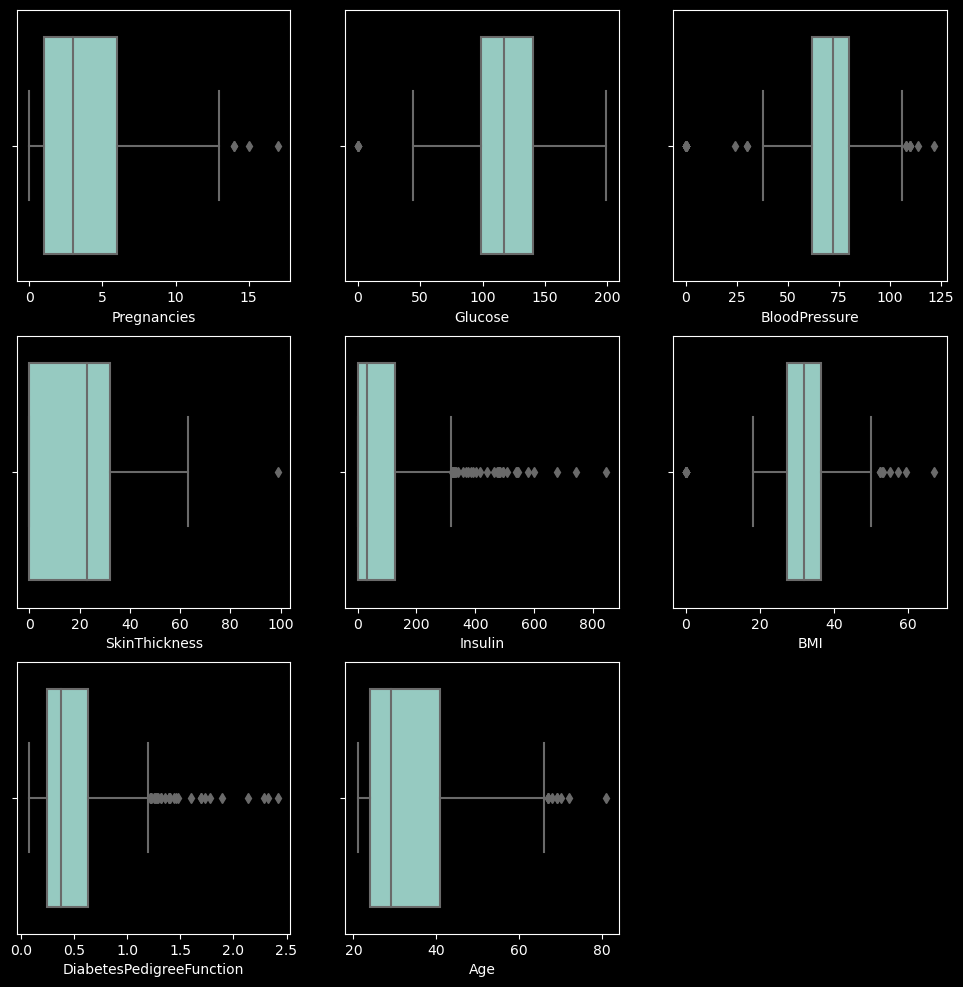

In [15]:
'''Observing outliers'''
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col,data = diabetes_dataset)
plt.show()

C:\Users\girid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\girid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\girid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\girid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

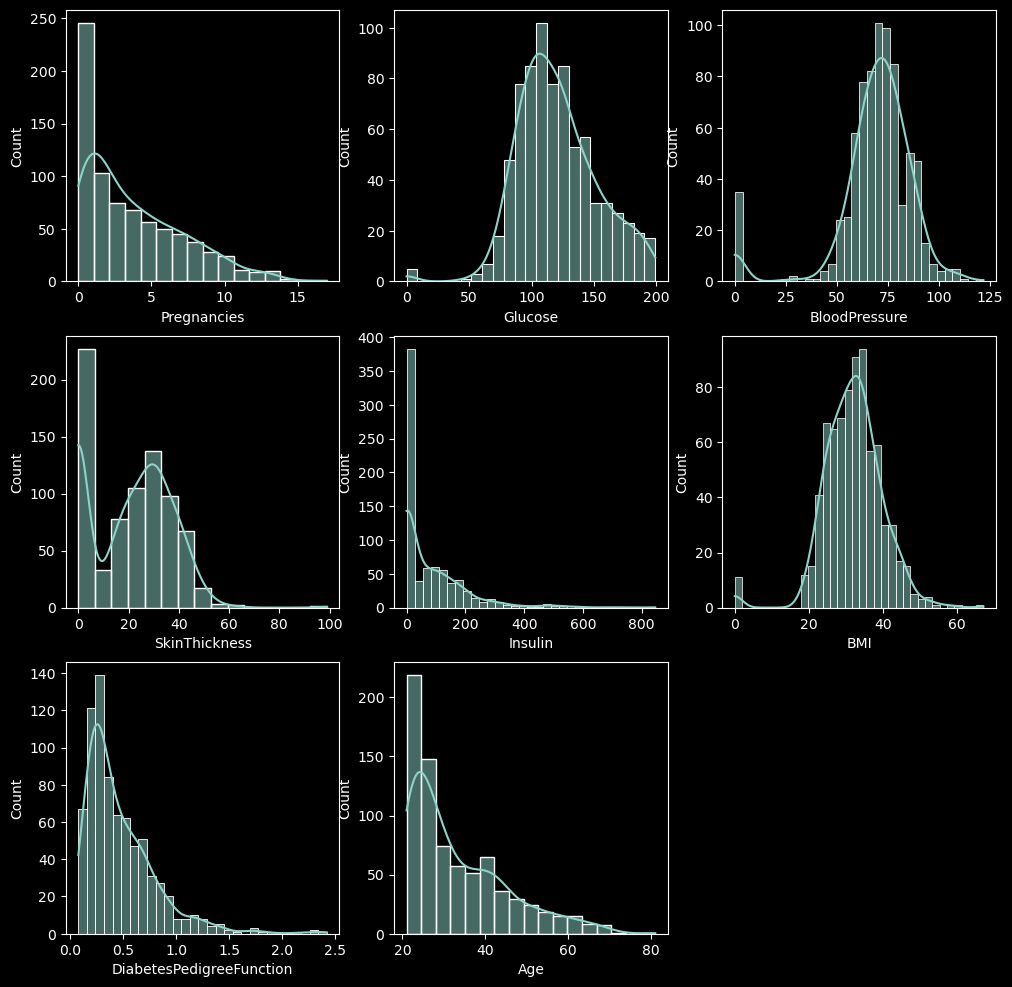

In [16]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col,data = diabetes_dataset , kde = True)
plt.show()

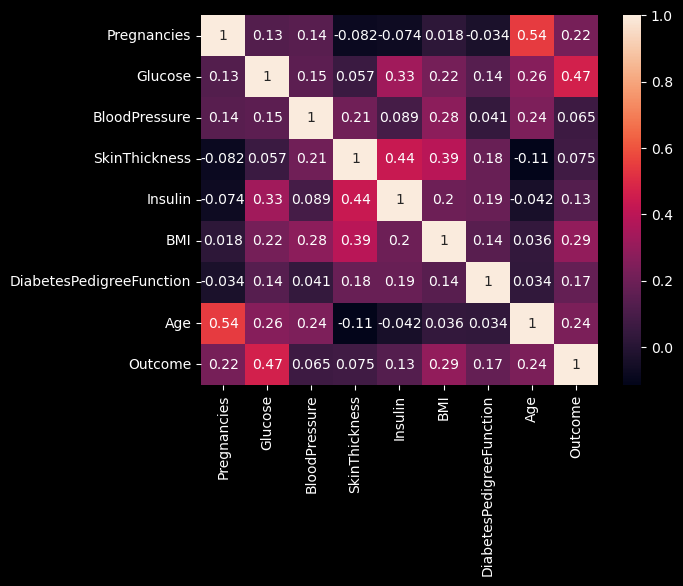

In [17]:
sns.heatmap(diabetes_dataset.corr(), annot = True)
plt.show()

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)


In [25]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


In [26]:
classifier = svm.SVC(kernel='linear')


In [27]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [28]:
# accuracy score on the Training DATA
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy Score of the Training Data : ', training_data_accuracy)


Accuracy Score of the Training Data :  0.7866449511400652


In [30]:
# accuracy score on the Training DATA
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy Score of the Test Data : ', test_data_accuracy)


Accuracy Score of the Test Data :  0.7727272727272727


In [32]:

# # Example of how the classifier and scaler should be loaded
# # classifier = load_classifier()  
# # scaler = load_scaler()

# def get_user_input():
#     """Function to get input from the user."""
#     print("\nPlease enter the following details:")

#     pregnancies = int(input("Number of pregnancies: "))
#     glucose = float(input("Glucose level: "))
#     blood_pressure = float(input("Blood pressure: "))
#     skin_thickness = float(input("Skin thickness: "))
#     insulin = float(input("Insulin level: "))
#     bmi = float(input("BMI (Body Mass Index): "))
#     diabetes_pedigree = float(input("Diabetes Pedigree Function: "))
#     age = int(input("Age: "))

#     return (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)

# while True:
#     # Get user input
#     input_data = get_user_input()

#     # Convert input data to numpy array
#     input_data_as_numpy_array = np.asarray(input_data)

#     # Reshape the array as we are predicting for one instance
#     input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#     # Standardize the input data
#     std_data = scaler.transform(input_data_reshaped)
#     print("Standardized data: ", std_data)

#     # Make prediction
#     prediction = classifier.predict(std_data)
#     print("Prediction: ", prediction)

#     # Display the result
#     if prediction[0] == 0:
#         print("The person is not diabetic.")
#     else:
#         print("The person is diabetic.")

#     # Ask the user if they want to input more data or quit
#     user_choice = input("\nDo you want to input another set of data? (yes/no): ").strip().lower()

#     if user_choice != "yes":
#         print("Exiting the program. Goodbye!")
#         break


In [33]:
import tkinter as tk
from tkinter import messagebox

In [34]:
# Assuming that 'scaler' and 'classifier' (SVM model) are pre-trained and loaded
# scaler = ... (Load your StandardScaler)
# classifier = ... (Load your SVM classifier model)

# Mock-up standard scaler and classifier for demonstration
# scaler = StandardScaler()  # Replace with your trained scaler
# classifier = SVC()         # Replace with your trained classifier

# Create the main window
window = tk.Tk()
window.title("Diabetes Prediction")

window.geometry("400x500")
window.configure(bg="#f0f8ff")  # Set background color

# Add title label with styling
title_label = tk.Label(window, text="Diabetes Prediction System", font=("Helvetica", 24, "bold"), bg="#4682b4", fg="white")
title_label.pack(pady=20, fill=tk.X)

# Create labels and entry fields for user inputs with custom styles
labels = [
    "Number of pregnancies:", "Glucose level:", "Blood pressure:",
    "Skin thickness:", "Insulin level:", "BMI (Body Mass Index):",
    "Diabetes Pedigree Function:", "Age:"
]

entries = []

label_font = ("Arial", 12)
entry_font = ("Arial", 11)

for i, label in enumerate(labels):
    lbl = tk.Label(window, text=label, font=label_font, bg="#f0f8ff", fg="#2f4f4f")
    lbl.pack(anchor="w", padx=20, pady=5)
    entry = tk.Entry(window, font=entry_font, width=25, borderwidth=2, relief="solid")
    entry.pack(pady=5)
    entries.append(entry)

def predict_diabetes():
    try:
        # Collect user input from the entry fields
        input_data = [
            int(entries[0].get()),  # pregnancies
            float(entries[1].get()),  # glucose
            float(entries[2].get()),  # blood pressure
            float(entries[3].get()),  # skin thickness
            float(entries[4].get()),  # insulin
            float(entries[5].get()),  # bmi
            float(entries[6].get()),  # diabetes pedigree function
            int(entries[7].get())     # age
        ]
        
        # Convert input data to numpy array
        input_data_as_numpy_array = np.asarray(input_data)

        # Reshape the array as we are predicting for one instance
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Standardize the input data
        std_data = scaler.transform(input_data_reshaped)

        # Make prediction
        prediction = classifier.predict(std_data)

        # Display the result with a custom message box style
        if prediction[0] == 0:
            messagebox.showinfo("Prediction Result", "The person is not diabetic.", icon="info")
        else:
            messagebox.showinfo("Prediction Result", "The person is diabetic.", icon="warning")
    
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid input values.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create the submit button with custom design
submit_btn = tk.Button(window, text="Predict Diabetes", command=predict_diabetes, font=("Arial", 12, "bold"), bg="#4682b4", fg="white", relief="raised", padx=10, pady=5)
submit_btn.pack(pady=20)

# Create an exit button
exit_btn = tk.Button(window, text="Exit", command=window.quit, font=("Arial", 12, "bold"), bg="#ff6347", fg="white", relief="raised", padx=10, pady=5)
exit_btn.pack(pady=10)

# Start the GUI event loop
window.mainloop()


C:\Users\girid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
